In [1]:
import pandas as pd
import os

# File path
file_name = "expenses.csv"

# Check if the file exists; if not, create it
if not os.path.exists(file_name):
    df = pd.DataFrame(columns=["Date", "Category", "Description", "Amount"])
    df.to_csv(file_name, index=False)
else:
    df = pd.read_csv(file_name)

print("Expense Tracker Initialized.")


Expense Tracker Initialized.


In [2]:
def add_expense():
    date = input("Enter the date (YYYY-MM-DD): ")
    category = input("Enter the category (e.g., Food, Transport): ")
    description = input("Enter a brief description: ")
    amount = float(input("Enter the amount: "))

    # Create a new entry
    new_entry = {"Date": date, "Category": category, "Description": description, "Amount": amount}

    # Append to the DataFrame using pd.concat
    global df
    df = pd.concat([df, pd.DataFrame([new_entry])], ignore_index=True)
    df.to_csv(file_name, index=False)
    print("Expense added successfully.")


In [4]:
def update_expense():
    date = input("Enter the date of the expense to update (YYYY-MM-DD): ")
    category = input("Enter the category: ")

    # Find the record
    idx = df[(df["Date"] == date) & (df["Category"] == category)].index
    if not idx.empty:
        description = input("Enter the new description: ")
        amount = float(input("Enter the new amount: "))

        df.loc[idx, "Description"] = description
        df.loc[idx, "Amount"] = amount
        df.to_csv(file_name, index=False)
        print("Expense updated successfully.")
    else:
        print("Expense not found.")


In [5]:
def delete_expense():
    date = input("Enter the date of the expense to delete (YYYY-MM-DD): ")
    category = input("Enter the category: ")

    # Drop the record
    global df
    df = df[~((df["Date"] == date) & (df["Category"] == category))]
    df.to_csv(file_name, index=False)
    print("Expense deleted successfully.")


In [6]:
categories = ["Food", "Transport", "Entertainment", "Utilities", "Others"]

def validate_category(category):
    if category not in categories:
        print(f"Invalid category. Please choose from {categories}.")
        return False
    return True


In [7]:
def analyze_expenses():
    print("Total Spending by Category:")
    print(df.groupby("Category")["Amount"].sum())

    print("\nCategory with Highest Spending:")
    print(df.groupby("Category")["Amount"].sum().idxmax())

    print("\nCategory with Lowest Spending:")
    print(df.groupby("Category")["Amount"].sum().idxmin())


In [8]:
import matplotlib.pyplot as plt

def visualize_expenses():
    # Bar chart
    df.groupby("Category")["Amount"].sum().plot(kind="bar", title="Spending by Category")
    plt.show()

    # Pie chart
    df.groupby("Category")["Amount"].sum().plot(kind="pie", autopct="%1.1f%%", title="Spending Distribution")
    plt.show()



Personal Expense Tracker
1. Add Expense
2. Update Expense
3. Delete Expense
4. Analyze Expenses
5. Visualize Expenses
6. Exit
Choose an option: 1
Enter the date (YYYY-MM-DD): 2024-12-09
Enter the category (e.g., Food, Transport): Food
Enter a brief description: lunch
Enter the amount: 500


<ipython-input-2-3a6f2f57b899>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([new_entry])], ignore_index=True)


Expense added successfully.

Personal Expense Tracker
1. Add Expense
2. Update Expense
3. Delete Expense
4. Analyze Expenses
5. Visualize Expenses
6. Exit
Choose an option: 4
Total Spending by Category:
Category
Food    500.0
Name: Amount, dtype: float64

Category with Highest Spending:
Food

Category with Lowest Spending:
Food

Personal Expense Tracker
1. Add Expense
2. Update Expense
3. Delete Expense
4. Analyze Expenses
5. Visualize Expenses
6. Exit
Choose an option: 5


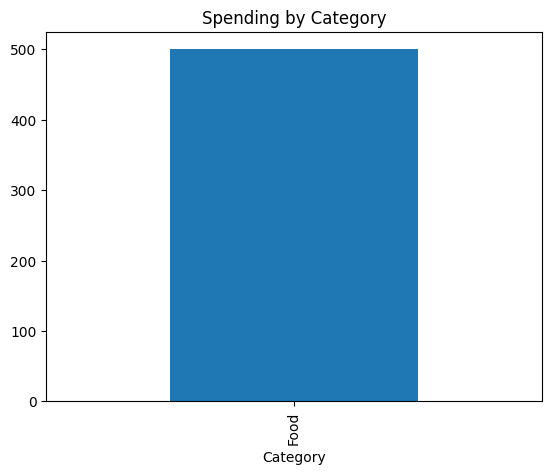

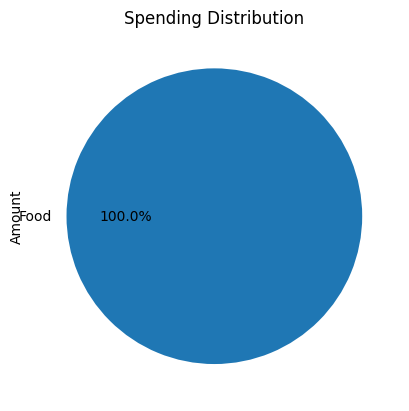


Personal Expense Tracker
1. Add Expense
2. Update Expense
3. Delete Expense
4. Analyze Expenses
5. Visualize Expenses
6. Exit


In [ ]:
def menu():
    while True:
        print("\nPersonal Expense Tracker")
        print("1. Add Expense")
        print("2. Update Expense")
        print("3. Delete Expense")
        print("4. Analyze Expenses")
        print("5. Visualize Expenses")
        print("6. Exit")

        choice = input("Choose an option: ")

        if choice == "1":
            add_expense()
        elif choice == "2":
            update_expense()
        elif choice == "3":
            delete_expense()
        elif choice == "4":
            analyze_expenses()
        elif choice == "5":
            visualize_expenses()
        elif choice == "6":
            print("Goodbye!")
            break
        else:
            print("Invalid choice. Please try again.")

menu()
